In [70]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline


In [71]:

data_df = pd.read_csv('Esvd_Full_Data_8th-Dec-2023_10-11-46_Database_Version_MAY2023V1.1.csv')
data_df.fillna({'Protection Status': 'No protection'}, inplace=True)
data_df.fillna({'Valuation Methods': 'OT'}, inplace=True)
data_df.fillna({'Site Area In Hectares': 0.0}, inplace=True)
data_df.fillna({'Site Length': 0.0}, inplace=True)

data_df["Beneficiary Unit"] = data_df["Beneficiary Unit"].str.lower().str.replace('s$', '', regex=True).str.replace('individual', 'person', regex=False)


/tmp/ipykernel_6989/2610743058.py:1: DtypeWarning: Columns (7,8,9,10,11,20,21,22,23,24,25,26,35,53,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('Esvd_Full_Data_8th-Dec-2023_10-11-46_Database_Version_MAY2023V1.1.csv')


count    6.635000e+03
mean     3.135875e+04
std      1.044523e+06
min      0.000000e+00
25%      1.729425e+01
50%      1.908251e+02
75%      1.452423e+03
max      7.899297e+07
Name: Int$ Per Hectare Per Year, dtype: float64

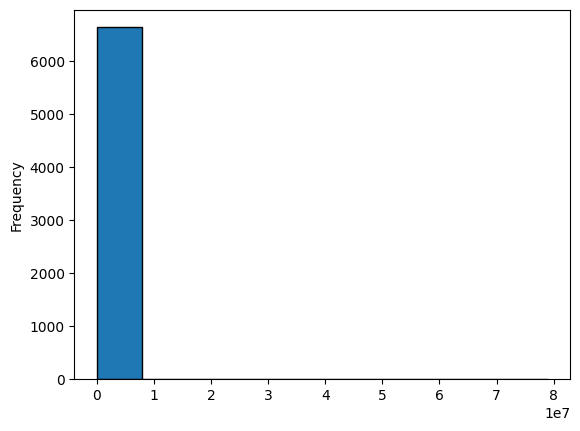

In [72]:
data_df['Int$ Per Hectare Per Year'].plot(kind='hist', edgecolor='black')

data_df['Int$ Per Hectare Per Year'].describe()

In [73]:
data_df[data_df['Int$ Per Hectare Per Year'] > 1000000].head()

,ValueId,StudyId,ESVD2.0_Biome,ESVD2.0_Biome_Codes,ESVD2.0_Biome_1,ESVD2.0_Biome_2,ESVD2.0_Biome_3,ESVD2.0_Biome_4,ESVD2.0_Biome_5,ESVD2.0_Biome_6,...,Type Of Beneficiary,Int$ Per Hectare Per Year,Authors,Title,Reference,Year_Pub,Notes,Secondary Data Sources,Reviewed,inclExcl
32,12350003,1235,"Rivers and lakes; Rangelands, natural grasslan...",4; 9,Rivers and lakes,"Rangelands, natural grasslands and savannas",NaN,NaN,NaN,NaN,...,Resources-dependent businesses (e.g. operators...,1.051330e+06,Gerner et al,Large scale river restoration pays off A case ...,"Gerner, N. V., Nafo, I., Winking, C., Wencki, ...",2018,Two different outcomes (values) are presented ...,NaN,Yes,NaN
277,11960001,1196,Marine,1,Marine,NaN,NaN,NaN,NaN,NaN,...,residents,7.899297e+07,O'Connor et al,Estimating the non-market benefit value of dee...,"O'Connor, E., Hynes, S., & Chen, W. (2020). Es...",2020,NaN,NaN,NaN,Excluded
279,11940001,1194,Urban and industrial areas,15,Urban and industrial areas,NaN,NaN,NaN,NaN,NaN,...,resident,1.283010e+06,"Mamani, J. C. Q., Gallardo, N. J. U., Mamani, ...",Willingness to pay for the recovery and conser...,"Mamani, J. C. Q., Gallardo, N. J. U., Mamani, ...",2021,only 80.4% of the residents were willing to pa...,NaN,Yes,NaN
316,11800001,1180,Urban and industrial areas,15,Urban and industrial areas,NaN,NaN,NaN,NaN,NaN,...,visitors,1.756181e+07,Menendez-Carbo et al,The economic value of Malecón 2000 in Guayaqui...,"Menendez-Carbo, S., Ruano, M. A., & Zambrano-M...",2020,NaN,NaN,Yes,NaN
317,11800002,1180,Urban and industrial areas,15,Urban and industrial areas,NaN,NaN,NaN,NaN,NaN,...,visitors,2.165114e+07,Menendez-Carbo et al,The economic value of Malecón 2000 in Guayaqui...,"Menendez-Carbo, S., Ruano, M. A., & Zambrano-M...",2020,NaN,NaN,Yes,NaN


In [74]:
train_index = data_df.index[(data_df['Int$ Per Hectare Per Year'] > 1) & (data_df['Int$ Per Hectare Per Year'] < 1000000)]
test_index = data_df.index[(data_df['Int$ Per Hectare Per Year'] < 1) | (data_df['Int$ Per Hectare Per Year'] > 1000000)]
print (len(train_index))
print (len(test_index))

6024
611


In [75]:
data_df[data_df['Int$ Per Hectare Per Year'].notnull()].shape

(6635, 127)

In [76]:
previous_null_len = len(data_df[data_df['Int$ Per Hectare Per Year'].isna()])
print (previous_null_len)

2865


In [77]:
data_df.loc[test_index, "Int$ Per Hectare Per Year"] = np.nan

In [78]:
data_df[data_df['Int$ Per Hectare Per Year'].isna()].shape

(3476, 127)

In [79]:
len(test_index) + previous_null_len

3476

count      6024.000000
mean       9023.290764
std       50177.972638
min           1.004200
25%          37.892675
50%         282.549200
75%        1730.825625
max      880238.726500
Name: Int$ Per Hectare Per Year, dtype: float64

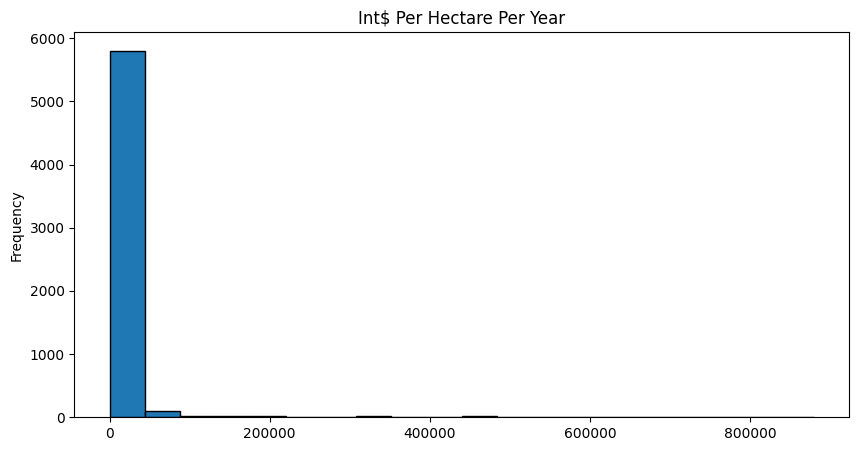

In [80]:
data_df['Int$ Per Hectare Per Year'].plot(kind='hist', edgecolor='black', title='Int$ Per Hectare Per Year', bins=20, figsize=(10, 5))

data_df['Int$ Per Hectare Per Year'].describe()

It is not straightforward to handle the Country_Codes column. If I use the one hot encoding, the dimensionality will likely explode.

In [81]:
print (data_df[data_df["ValueId"] == 10440027]["Country_Codes"])

1852    MEX; BLZ; HND; GTM
Name: Country_Codes, dtype: object


In [82]:

#countries_codes = [x.strip() for x in str(row['Country_Codes']).split(';') if str(row['Country_Codes']) != "nan"]

data_df["Country_Codes"] = data_df["Country_Codes"].str.split(pat="; ")

In [83]:

print (data_df[data_df["ValueId"] == 10440027]["Country_Codes"])

1852    [MEX, BLZ, HND, GTM]
Name: Country_Codes, dtype: object


In [84]:
countries = pd.read_csv('countries.csv')

countries_countries = {}

countries_countries["WLD"] = {"name": "World", "sub_region": "World", "region": "World"}

for index, row in countries.iterrows():
    code = row['alpha-3']
    name = row['name']
    region = row['region']
    sub_region = row['sub-region']

    countries_countries[code] = {"name": name, "sub_region": sub_region, "region": region}

In [85]:
subregions = []
for index, row in data_df.iterrows():
    if isinstance(row['Country_Codes'], list):
        if len(row['Country_Codes']) ==0:
            subregion.append("WLD")
        else:
            temp = ""

            for c in row['Country_Codes']:
                #print (c)
                subregion = countries_countries[c]["sub_region"]

                if temp == "":
                    temp = subregion
                else:
                    if temp != subregion:
                        temp = "WLD"
                        break
            subregions.append(temp)
    else:   
        subregions.append("WLD")

data_df["subregion"] = subregions

In [86]:
data_df["subregion"].head()

0    Western Europe
1    Western Europe
2    Western Europe
3    Western Europe
4    Western Europe
Name: subregion, dtype: object

In [87]:

data_df["beneficiary_unit_codes"] = pd.Categorical(data_df["Beneficiary Unit"]).codes
data_df["beneficiary_unit_codes"].unique()

array([ 1,  0,  2,  4, -1,  3], dtype=int8)

In [88]:
data_df["Protection Status"].unique()

array(['No protection', 'Protected', 'Partially protected'], dtype=object)

In [89]:
#data_df["protection_status_one_hot"] = data_df["Protection Status"].astype('category').cat.codes

data_df["protection_status_codes"] = pd.Categorical(data_df["Protection Status"]).codes
data_df["protection_status_codes"].unique()

array([0, 2, 1], dtype=int8)

In [90]:
data_df["valuation_methods_codes"] = pd.Categorical(data_df["Valuation Methods"]).codes
data_df["valuation_methods_codes"].unique()

array([  0,  25,  37,  90,  14,  39,   4,  96,  55,  69,  87, 100,  75,
        89, 101,  38,  62,  97,  51,   5,  61,  64,  56,  80,  81,  58,
        60,  44,  41,   6,  17,  19,  49,  20,  22,  70,  16,  48,  40,
        52,  54,  63,  23,  50,  42,  53,  57,  18,  71,  21,  68,  98,
        24,  99, 103, 104,   3,  84, 102,  34,  13,  66,   1,  82,  85,
        67,  59,  88,  35,  33,  83,  32,  92,  31,  27,  45,  43,  91,
        76,  15,   2,  78,  95,  74,  86,  79,  29,  93,   9,  30,  11,
        47,  94,   8,  10,  65,  77,  73,  36,  72,  26,  28,  12,   7,
        46], dtype=int8)

In [91]:
data_df["subregion_codes"] = pd.Categorical(data_df["subregion"]).codes
data_df["subregion_codes"].unique()

array([17,  4, 18,  7, 14, 13,  8, 12, 16,  1,  3,  9,  2,  5, 15, 11,  6,
        0, 10], dtype=int8)

In [92]:
data_df["SEEA"].unique()

array(['Visual amenity services', 'Ecosystem and species appreciation',
       'Air filtration services; Local (micro and meso) climate regulation services; Noise attenuation services',
       'Visual amenity services; Air filtration services; Ecosystem and species appreciation; Noise attenuation services',
       'Recreation-related services',
       'Recreation-related services; Visual amenity services; Education, scientific and research services; Spiritual, artistic and symbolic services; Other cultural services',
       'Peak flow mitigation services',
       'Education, scientific and research services',
       'Wood provisioning services', 'Global climate regulation services',
       'Wild animals, plants and other biomass provisioning services; Recreation-related services',
       'Global climate regulation services; Local (micro and meso) climate regulation services; Air filtration services; Peak flow mitigation services; River flood mitigation services; Noise attenuation servi

In [93]:

xtrain = data_df.loc[data_df['Int$ Per Hectare Per Year'].notnull(), ["protection_status_codes", "beneficiary_unit_codes", "valuation_methods_codes", "Site Area In Hectares", "Site Length", "subregion_codes"]]
ytrain = data_df.loc[data_df['Int$ Per Hectare Per Year'].notnull(), ["Int$ Per Hectare Per Year"]]

xtest = data_df.loc[data_df['Int$ Per Hectare Per Year'].isnull(), ["protection_status_codes", "beneficiary_unit_codes", "valuation_methods_codes", "Site Area In Hectares", "Site Length", "subregion_codes"]]
ytest = data_df.loc[data_df['Int$ Per Hectare Per Year'].isnull(), ["Int$ Per Hectare Per Year"]]

xtest_id = data_df.loc[data_df['Int$ Per Hectare Per Year'].isnull(), ["ValueId"]]

print (xtrain.shape)
print (ytrain.shape)

print (xtest.shape)


(6024, 6)
(6024, 1)
(3476, 6)


| Parameter_Neo4j | Vaule_Neo4j | Parameter_Sklearn | Value_Sklearn |
| --- | --- | --- | --- |
| maxDepth | No max depth | max_depth | None |
| minLeafSize | 1 | min_samples_leaf | 1 |
| numberOfDecisionTrees | 100 | n_estimators | 100 |
| minSplitSize | 2 | min_samples_split | 2 |
| maxFeaturesRatio | 1 / sqrt(n_features) | max_features | 1 |
| numberOfSamplesRatio | 1 | max_samples | None |


I want to use the Normalized RMSE = RMSE / (max value – min value) to get a better idea of the model performance

In [94]:
max_value = ytrain.values.max()
min_value = ytrain.values.min()

In [95]:
max_value

880238.7265

In [96]:
min_value

1.0042

In [97]:
regr = RandomForestRegressor(max_depth=10)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(regr, xtrain, ytrain.values.ravel(), scoring = 'neg_root_mean_squared_error',
                         cv = cv, n_jobs = -1)

print (scores)

rmse = np.mean(np.abs(scores))

normalized_rmse = rmse / (max_value - min_value)

print (rmse)

print (normalized_rmse)

[-31099.06624002 -30664.72478285 -50687.65585883 -18723.81680752
 -48509.02297955 -34094.64160126 -27312.53073963 -20815.82293465
 -26393.87626177 -22285.07472539]
31058.62329314616
0.03528435842534916


In [98]:

regr.fit(xtrain, ytrain)

/home/dgg32/anaconda3/envs/bigquery_pricing/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10)

In [99]:
prediction = regr.predict(xtest)

In [100]:
xtest_id.values.ravel()

array([12410006, 12410005, 12410004, ...,    80004,    60005,    40002])

In [101]:
prediction

array([ 5742.06938744,  5742.06938744,  5742.06938744, ...,
       14474.61102975,  3996.52508707,  2216.65307889])

In [102]:
df = pd.DataFrame({'name': xtest_id.values.ravel(), 'RF': prediction})
df.head()

,name,RF
0,12410006,5742.069387
1,12410005,5742.069387
2,12410004,5742.069387
3,12410003,5742.069387
4,12410002,5742.069387


In [103]:
df.to_csv("predicted_SklearnRF.tsv", sep="\t", index=False)